In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import metrics
from keras.models import load_model

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

A ideia nesse notebook (e nos próximos) e criar modelos de feed foward networks no Keras, nesse modelo iremos usar as variáveis numéricas de 2 anos (0709 ou 0911 ou 1113 ou 1315) para tentar predizer o Ideb do ano seguinte aos tais (11,13,15,17 respectivamente)

Import os dados separados no Gamma7

In [8]:
train0709 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\train_0709.csv')
train0911 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\train_0911.csv')
train1113 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\train_1113.csv')
train1315 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\train_1315.csv')

In [9]:
pred1517 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_2anos\pred_1517.csv')

Separar os targets para cada conjunto de anos

In [11]:
train0709_target = train0709[['Ideb2011']]
train0709.drop(columns=['Ideb2011','Ideb2013','Ideb2015','Ideb2017'],inplace=True)

train0911_target = train0911[['Ideb2013']]
train0911.drop(columns=['Ideb2007','Ideb2013','Ideb2015','Ideb2017'],inplace=True)

train1113_target = train1113[['Ideb2015']]
train1113.drop(columns=['Ideb2007','Ideb2009','Ideb2015','Ideb2017'],inplace=True)

train1315_target = train1315[['Ideb2017']]
train1315.drop(columns=['Ideb2007','Ideb2009','Ideb2011','Ideb2017'],inplace=True)

pred1517.drop(columns=['Ideb2007','Ideb2009','Ideb2011','Ideb2013'],inplace=True)

In [11]:
list(pred1517.columns)

['Unnamed: 0',
 'ano_censo0',
 'Cod_Escola_Completo',
 'regiao0',
 'tp_dependencia0',
 'num_matriculas0',
 'num_estudantes0',
 'num_estudantes_ensino_infantil0',
 'num_estudantes_ensino_fund_anos_iniciais0',
 'num_estudantes_ensino_fund_anos_finais0',
 'num_estudantes_fund_1_ano0',
 'num_estudantes_fund_2_ano0',
 'num_estudantes_fund_3_ano0',
 'num_estudantes_fund_4_ano0',
 'num_estudantes_fund_5_ano0',
 'num_estudantes_fund_6_ano0',
 'num_estudantes_fund_7_ano0',
 'num_estudantes_fund_8_ano0',
 'num_estudantes_fund_9_ano0',
 'num_estudantes_medio_1_serie0',
 'num_estudantes_medio_2_serie0',
 'num_estudantes_medio_3_serie0',
 'num_turmas0',
 'tp_localizacao0',
 'num_salas_existentes0',
 'num_salas_utilizadas0',
 'num_equip_tv0',
 'num_equip_videocassete0',
 'num_equip_dvd0',
 'num_equip_parabolica0',
 'num_equip_copiadora0',
 'num_equip_retroprojetor0',
 'num_equip_impressora0',
 'num_equip_impressora_mult0',
 'num_equip_som0',
 'num_equip_multimidia0',
 'num_equip_fax0',
 'num_equip_f

In [12]:
Cod_Escolas = pred1517['Cod_Escola_Completo']

Dropar as colunas não úteis na predição

In [13]:
train0709.drop(columns=['Unnamed: 0','ano_censo0','ano_censo0.1','Cod_Escola_Completo','is_anosiniciais0','is_anosiniciais0.1','regiao0','regiao0.1'],inplace=True)
train0911.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','regiao','regiao0'],inplace=True)
train1113.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','regiao','regiao0'],inplace=True)
train1315.drop(columns=['Unnamed: 0','ano_censo','ano_censo0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','regiao','regiao0'],inplace=True)

pred1517.drop(columns=['Unnamed: 0','ano_censo0','ano_censo0.1','Cod_Escola_Completo','is_anosiniciais0','is_anosiniciais0.1','regiao0','regiao0.1'],inplace=True)

Normalizando e scalando os dados para virar a entrada da rede neural

In [14]:
train0709_s = scale(train0709)
train0911_s = scale(train0911)
train1113_s = scale(train1113)
train1315_s = scale(train1315)

pred1517_s = scale(pred1517)

pred1517_idebs_s = scale(pred1517_idebs)

C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher

Modelo treinado com 0709

Como temos muitas features para o modelo, e algumas talvez não tenham tanta influencia na predição quanto outras. Para melhorar a entrada da rede iremos aplicar um PCA nas features de entradas, e iremos usar as 25 primeiras componentes principais, que explicarão quase todas a informação que estava codificada nas features originais (irei repetir esse processo para todos os modelos numéricos)

In [15]:
pca_0709 = PCA(n_components=25)
pca_0709.fit(train0709_s)
train0709_t = pca_0709.transform(train0709_s)

In [16]:
X_train_0709, X_test_0709, y_train_0709, y_test_0709 = train_test_split(train0709_t,train0709_target,test_size=0.1,random_state=932)

In [17]:
model_0709 = Sequential()
n_cols = X_train_0709.shape[1]
model_0709.add(Dense(45,activation='relu',input_shape = (n_cols,)))
model_0709.add(Dense(33,activation='relu',input_shape = (n_cols,)))
#model_0709.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_0709.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [18]:
model_0709.compile(optimizer='adam',loss='mean_squared_error')
model_0709.fit(X_train_0709,y_train_0709,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23835 samples, validate on 5959 samples
Epoch 1/100
23835/23835 [==============================] - 1s 38us/step - loss: 1.5950 - val_loss: 0.4028
Epoch 2/100
23835/23835 [==============================] - 1s 37us/step - loss: 0.3597 - val_loss: 0.3257
Epoch 3/100
23835/23835 [==============================] - 1s 40us/step - loss: 0.3080 - val_loss: 0.2989
Epoch 4/100
23835/23835 [==============================] - 1s 35us/step - loss: 0.2908 - val_loss: 0.2912
Epoch 5/100
23835/23835 [==============================] - 1s 36us/step - loss: 0.2798 - val_loss: 0.2968
Epoch 6/100
23835/23835 [==============================] - 1s 35us/step - loss: 0.2752 - val_loss: 0.3090


In [19]:
model_0709.evaluate(X_test_0709,y_test_0709)

3311/3311 [==============================] - 0s 13us/step


0.306426020654729

Salvando o modelo para usar no Gamma23 fazer a predição com todos os modelos 

In [48]:
model_0709.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_0709_num.h5')

Modelo treinado com 0911

In [20]:
pca_0911 = PCA(n_components=25)
pca_0911.fit(train0911_s)
train0911_t = pca_0911.transform(train0911_s)

In [21]:
X_train_0911, X_test_0911, y_train_0911, y_test_0911 = train_test_split(train0911_t,train0911_target,test_size=0.1,random_state=932)

In [24]:
model_0911 = Sequential()
n_cols = X_train_0911.shape[1]
model_0911.add(Dense(45,activation='relu',input_shape = (n_cols,)))
model_0911.add(Dense(23,activation='relu',input_shape = (n_cols,)))
#model_0911.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_0911.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [25]:
model_0911.compile(optimizer='adam',loss='mean_squared_error')
model_0911.fit(X_train_0911,y_train_0911,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23837 samples, validate on 5960 samples
Epoch 1/100
23837/23837 [==============================] - 1s 41us/step - loss: 1.4240 - val_loss: 0.4121
Epoch 2/100
23837/23837 [==============================] - 1s 31us/step - loss: 0.3702 - val_loss: 0.3344
Epoch 3/100
23837/23837 [==============================] - 1s 31us/step - loss: 0.3308 - val_loss: 0.3179
Epoch 4/100
23837/23837 [==============================] - 1s 31us/step - loss: 0.3106 - val_loss: 0.3101
Epoch 5/100
23837/23837 [==============================] - 1s 31us/step - loss: 0.2997 - val_loss: 0.3005
Epoch 6/100
23837/23837 [==============================] - 1s 32us/step - loss: 0.2953 - val_loss: 0.3003
Epoch 7/100
23837/23837 [==============================] - 1s 31us/step - loss: 0.2900 - val_loss: 0.2961
Epoch 8/100
23837/23837 [==============================] - 1s 31us/step - loss: 0.2874 - val_loss: 0.2903
Epoch 9/100
23837/23837 [==============================] - 1s 33us/step - loss: 0.2832 - val_loss: 0.29

In [26]:
model_0911.evaluate(X_test_0911,y_test_0911)

3311/3311 [==============================] - 0s 15us/step


0.281353554564349

In [49]:
model_0911.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_0911_num.h5')

Modelo treinado com 1113

In [27]:
pca_1113 = PCA(n_components=25)
pca_1113.fit(train1113_s)
train1113_t = pca_1113.transform(train1113_s)

In [28]:
X_train_1113, X_test_1113, y_train_1113, y_test_1113 = train_test_split(train1113_t,train1113_target,test_size=0.1,random_state=932)

In [29]:
model_1113 = Sequential()
n_cols = X_train_1113.shape[1]
model_1113.add(Dense(33,activation='relu',input_shape = (n_cols,)))
model_1113.add(Dense(20,activation='relu',input_shape = (n_cols,)))
#model_1113.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_1113.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [30]:
model_1113.compile(optimizer='adam',loss='mean_squared_error')
model_1113.fit(X_train_1113,y_train_1113,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23836 samples, validate on 5959 samples
Epoch 1/100
23836/23836 [==============================] - 1s 42us/step - loss: 3.2911 - val_loss: 0.6854
Epoch 2/100
23836/23836 [==============================] - 1s 32us/step - loss: 0.6950 - val_loss: 0.4606
Epoch 3/100
23836/23836 [==============================] - 1s 31us/step - loss: 0.4143 - val_loss: 0.3689
Epoch 4/100
23836/23836 [==============================] - 1s 32us/step - loss: 0.3367 - val_loss: 0.3298
Epoch 5/100
23836/23836 [==============================] - 1s 31us/step - loss: 0.3119 - val_loss: 0.3094
Epoch 6/100
23836/23836 [==============================] - 1s 31us/step - loss: 0.3121 - val_loss: 0.3071
Epoch 7/100
23836/23836 [==============================] - 1s 32us/step - loss: 0.3282 - val_loss: 0.2948
Epoch 8/100
23836/23836 [==============================] - 1s 32us/step - loss: 0.3165 - val_loss: 0.2857
Epoch 9/100
23836/23836 [==============================] - 1s 32us/step - loss: 0.2953 - val_loss: 0.28

In [31]:
model_1113.evaluate(X_test_1113,y_test_1113)

3311/3311 [==============================] - 0s 14us/step


0.2631794283691399

In [50]:
model_1113.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_1113_num.h5')

Modelo treinado com 1315

In [32]:
pca_1315 = PCA(n_components=25)
pca_1315.fit(train1315_s)
train1315_t = pca_1315.transform(train1315_s)

In [33]:
X_train_1315, X_test_1315, y_train_1315, y_test_1315 = train_test_split(train1315_t,train1315_target,test_size=0.1,random_state=932)

In [34]:
model_1315 = Sequential()
n_cols = X_train_1315.shape[1]
model_1315.add(Dense(48,activation='relu',input_shape = (n_cols,)))
model_1315.add(Dense(23,activation='relu',input_shape = (n_cols,)))
#model_1315.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_1315.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [35]:
model_1315.compile(optimizer='adam',loss='mean_squared_error')
model_1315.fit(X_train_1315,y_train_1315,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23824 samples, validate on 5957 samples
Epoch 1/100
23824/23824 [==============================] - 1s 45us/step - loss: 3.1583 - val_loss: 0.7993
Epoch 2/100
23824/23824 [==============================] - 1s 33us/step - loss: 0.6287 - val_loss: 0.4766
Epoch 3/100
23824/23824 [==============================] - 1s 33us/step - loss: 0.3963 - val_loss: 0.3934
Epoch 4/100
23824/23824 [==============================] - 1s 34us/step - loss: 0.3473 - val_loss: 0.3444
Epoch 5/100
23824/23824 [==============================] - 1s 33us/step - loss: 0.3226 - val_loss: 0.3176
Epoch 6/100
23824/23824 [==============================] - 1s 36us/step - loss: 0.3272 - val_loss: 0.3077
Epoch 7/100
23824/23824 [==============================] - 1s 45us/step - loss: 0.3233 - val_loss: 0.3026
Epoch 8/100
23824/23824 [==============================] - 1s 40us/step - loss: 0.3306 - val_loss: 0.2847
Epoch 9/100
23824/23824 [==============================] - 1s 38us/step - loss: 0.3190 - val_loss: 0.28

In [36]:
model_1315.evaluate(X_test_1315,y_test_1315)

3309/3309 [==============================] - 0s 16us/step


0.2967785579645227

In [51]:
model_1315.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_1315_num.h5')

Vendo resultado dos modelos na base 1517

In [37]:
pred0709_t = pca_0709.transform(pred1517_s)
pred0911_t = pca_0911.transform(pred1517_s)
pred1113_t = pca_1113.transform(pred1517_s)
pred1315_t = pca_1315.transform(pred1517_s)

In [52]:
pd.DataFrame(pred0709_t).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred0709_t_num.csv')
pd.DataFrame(pred0911_t).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred0911_t_num.csv')
pd.DataFrame(pred1113_t).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred1113_t_num.csv')
pd.DataFrame(pred1315_t).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred1315_t_num.csv')

In [38]:
pred_0709 = pd.Series(data=model_0709.predict(pred0709_t)[:,0])
pred_0911 = pd.Series(data=model_0911.predict(pred0911_t)[:,0])
pred_1113 = pd.Series(data=model_1113.predict(pred1113_t)[:,0])
pred_1315 = pd.Series(data=model_1315.predict(pred1315_t)[:,0])

In [43]:
ideb2011_media = 4.679378 #train0709_target.mean()
ideb2013_media = 4.827755 #train0911_target.mean()
ideb2015_media = 5.131154 #train1113_target.mean()
ideb2017_media = 5.352877 #train1315_target.mean()

Os modelos foram treinados à regredir para o valor do ano seguinte, como a média dos Idebs mudam de ano a ano, o modelo treinado com o Ideb2011 como target, por exemplo, tende a dar notas do Ideb perto da média do Ideb2011.

Para corrigir esse viés, iremos ver a diferença do valor previsto para a média do IdebTarget do modelo, e aplicaremos essa diferença ao Ideb2017, depois ainda multiplicaremos pela constante de aumento de Ideb, assumindo que continuará aumentando parecido com os anos passados

In [44]:
cte = (5.352877/5.131154 + 5.131154/4.827755 + 4.827755/4.679378)/3

In [50]:
cte

1.0459215257160788

In [45]:
output = pd.DataFrame()
output['pred_0709'] = (pred1517['Ideb2017'].mean() + (pred_0709 - ideb2011_media))*cte
output['pred_0911'] = (pred1517['Ideb2017'].mean() + (pred_0911 - ideb2013_media))*cte
output['pred_1113'] = (pred1517['Ideb2017'].mean() + (pred_1113 - ideb2015_media))*cte
output['pred_1315'] = (pred1517['Ideb2017'].mean() + (pred_1315 - ideb2017_media))*cte
output['ensemble'] = ((output['pred_0709']+output['pred_0911']+output['pred_1113']+output['pred_1315'])/4)
output['Ideb2017'] = pred1517['Ideb2017'] 
output['dif'] = output['ensemble'] - output['Ideb2017']
output['Cod_Escola'] = Cod_Escolas

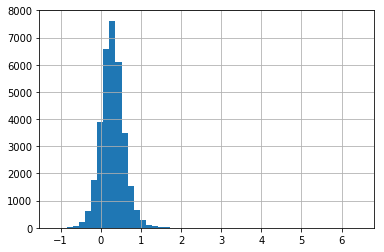

In [46]:
output['dif'].hist(bins=50)

In [47]:
output.describe()

,pred_0709,pred_0911,pred_1113,pred_1315,ensemble,Ideb2017,dif,Cod_Escola
count,33092.000000,33092.000000,33092.000000,33092.000000,33092.000000,33092.000000,33092.000000,3.309200e+04
mean,5.757081,5.643177,5.567036,5.593109,5.640101,5.352844,0.287257,3.302630e+07
std,1.011615,0.999510,0.999002,1.096931,1.010481,1.101268,0.290051,9.648159e+06
min,2.455069,2.740963,2.594642,2.095716,2.739929,1.600000,-1.152103,1.100026e+07
25%,5.001543,4.898326,4.790727,4.751007,4.867996,4.600000,0.105889,2.703248e+07
50%,5.710810,5.606618,5.503328,5.523297,5.584876,5.300000,0.280980,3.303959e+07
75%,6.510005,6.398878,6.339278,6.424258,6.415680,6.200000,0.458947,4.105249e+07
max,10.412241,17.733371,13.513200,20.657344,12.232172,9.600000,6.432172,5.301462e+07


Organizar os samples e as predições por diferença entre Ideb2019 previsto e o Ideb2017

In [46]:
output_sort_dif = output.sort_values(['dif'],ascending=False)
output_sort_dif

,pred_0709,pred_0911,pred_1113,pred_1315,ensemble,Ideb2017,dif,Cod_Escola
16114,17.526509,13.455114,13.295857,10.263385,13.635216,5.8,7.835216,33078238
10202,8.841345,19.190076,7.703472,7.739180,10.868518,5.2,5.668518,41014375
24821,6.783746,13.695180,5.992169,4.917863,7.847240,5.2,2.647240,21233594
26795,5.209882,5.362359,5.062915,4.590098,5.056313,2.6,2.456313,26048841
13740,7.709617,7.233768,5.051186,3.923553,5.979531,3.8,2.179531,22014802
23925,4.666467,4.343467,4.427411,4.207129,4.411119,2.3,2.111119,13055810
26498,4.527168,4.328674,4.078187,3.685744,4.154943,2.1,2.054943,22067779
18726,10.013118,8.249812,5.948888,4.840933,7.263188,5.3,1.963188,33027188
305,3.608334,4.151026,3.535019,3.356188,3.662642,1.7,1.962642,11001844
6581,4.123899,4.496779,3.317009,3.266781,3.801117,1.9,1.901117,33100659


Exportar as 1000 escolas que mais melhorariam usando esse modelo

In [47]:
best_esc_pred2 = output_sort_dif.head(1000)

In [48]:
best_esc_pred2.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\best_schools\best_esc_pred2(sem_ideb).csv')